In [9]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data = np.load("../data/data_785_99.npy")

In [3]:
svd_res = np.linalg.svd(data)

In [6]:
[x.shape for x in svd_res]

[(9511, 9511), (785,), (785, 785)]

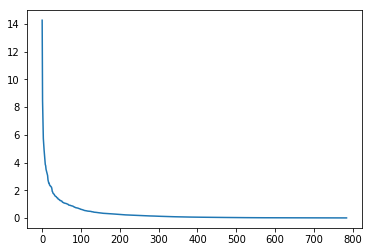

In [10]:
plt.plot(svd_res[1])

In [11]:
svd_res[2]

array([[ -4.76345542e-06,  -2.25080927e-03,  -7.08900749e-04, ...,
         -8.24066203e-04,  -2.56971838e-06,  -1.33671899e-04],
       [ -3.45848255e-06,   2.22747559e-03,   5.97612598e-04, ...,
          9.55032874e-04,  -1.56035587e-07,   1.02625740e-04],
       [  8.92679782e-07,  -4.28652986e-04,   2.16757405e-05, ...,
         -5.75369607e-04,   9.38903441e-07,   2.01543379e-05],
       ..., 
       [  6.30903515e-06,   1.07695395e-06,  -4.31657058e-07, ...,
         -4.85665953e-07,   7.71194125e-05,  -4.47053998e-05],
       [  4.04589567e-05,   7.31898876e-07,  -1.88710409e-05, ...,
          4.19151786e-07,   6.61746720e-05,  -3.79218422e-05],
       [  3.65972614e-05,   2.43292211e-07,   2.28907454e-07, ...,
          1.50357005e-06,  -1.65657873e-05,   2.51632981e-06]])

In [14]:
svd_res[0][:, :20].shape

(9511, 20)

In [17]:
svd_res[-1][:, :20].shape

(785, 20)